# Polynomial Regression

### ex: with 2 features x1 and x2 the representation would be: Y = b0 + b1x1 + b2x1² + b3x2 + b4x2² + b5x1x2

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [4]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values #it has to be an array like a table
y = dataset.iloc[:,-1].values

## Training the Linear Regression model on the whole dataset
###(If the data set is small then in some scenarios you wouldn't split it into train and test, but in general for large datasets you would split the data)

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

"""We train on linear regression before polynomial regression because:

- It is a simpler model with fewer parameters, which makes it easier to train and interpret.
- It can be a good baseline model to understand the data and identify any linear relationships.
- It can be used to initialize the parameters of a polynomial regression model, which can help it to converge to a better solution more quickly.
- It can help to avoid overfitting, which is a common problem with polynomial regression models.

Training on linear regression first can help us to get better results from the polynomial regression model"""

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)

"""a degree of 2 is used because it strikes a good balance between capturing non-linear relationships in the data while avoiding excessive complexity.
 A degree of 2 allows the model to capture quadratic relationships, which is often sufficient for many real-world scenarios.
if you suspect a cubic relationship, you might try a degree of 3. However, always be cautious of overfitting, as higher-degree polynomials can easily lead to capturing noise rather than true patterns in the data.
Experimentation and validation with appropriate metrics are key to determining the optimal degree.
Data Visualization can help: Plot your data to visually assess the underlying trend. If it appears more complex than a parabola, a higher degree (than just 2) might be necessary."""

"""Fit is crucial as it ensures that the polynomial features are appropriately scaled and aligned with the training data, allowing for accurate polynomial regression modeling.
Simply using transform() wouldn't determine these parameters, potentially leading to incorrect polynomial representations and inaccurate predictions."""

LinearRegression()

## Visualising the Linear Regression results

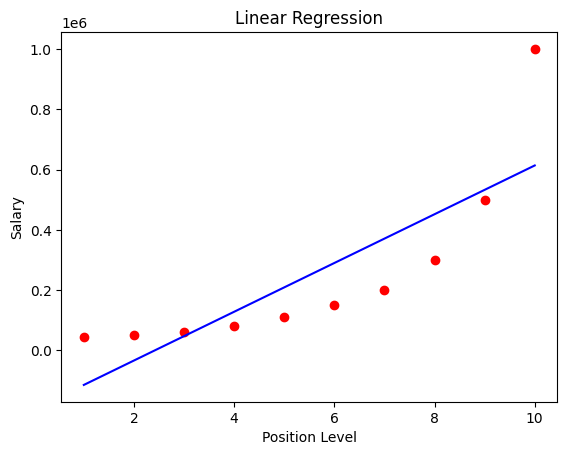

In [8]:
plt.scatter(X,y, color = 'red')
plt.plot(X,lin_reg.predict(X),color='blue')
plt.title('Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results

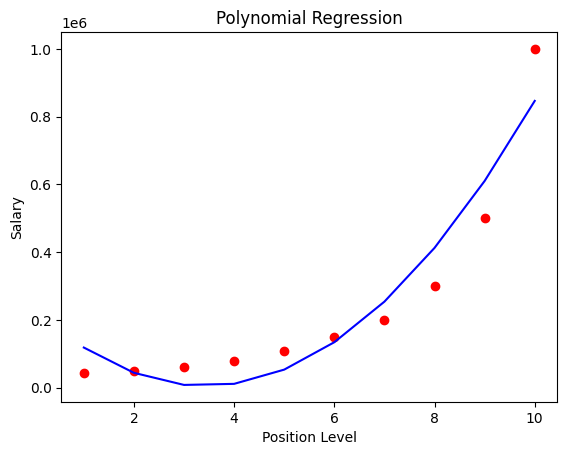

In [11]:
plt.scatter(X,y, color = 'red')
plt.plot(X,lin_reg2.predict(X_poly),color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

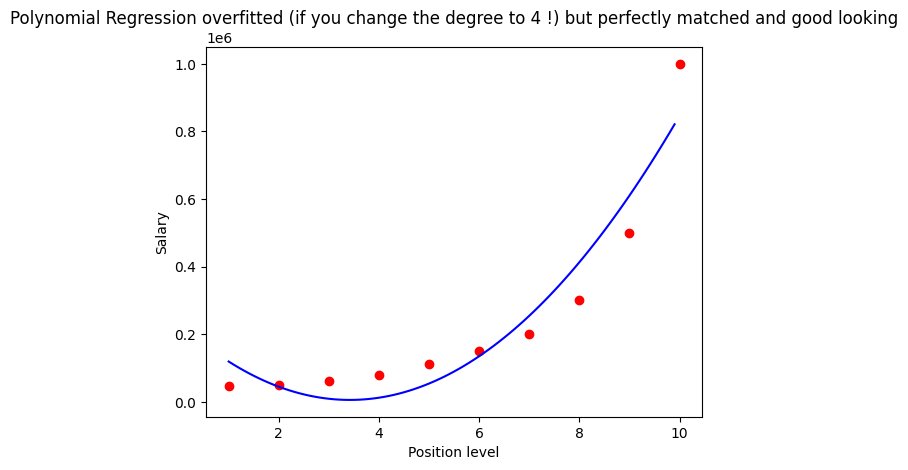

In [16]:
#X_grid = np.arange(min(X), max(X), 0.1)
#X_grid = np.arange(min(X), max(X), 0.1)[0]
X_grid = np.arange(min(X.flatten()), max(X.flatten()), 0.1) #this seems to work
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Polynomial Regression overfitted (if you change the degree to 4 !) but perfectly matched and good looking')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [17]:
lin_reg.predict([[6.5]])

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [18]:
lin_reg2.predict(poly_reg.fit_transform([[6.5]]))

array([189498.10606061])